In [883]:
# ===================================================================
# Import necessary modules
# ===================================================================

In [884]:
import math
import time
import random
import copy
import sys

# For graphs
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [885]:
# ===================================================================
# Define Functions
# ===================================================================

In [886]:
# Calculates distance between two points (2-D points)
def calcDistance(a, b):
        distance = ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5 # 2-D distance
        return distance

In [887]:
# Calculates the square distance between two points (2-D points)
# Added as alternative to calcDistance. Change functions in code to use this method instead.
# This is a short-cut to avoid O(n**2/2) sqrt calls, which can be
# computationally expensive in terms of time
def calcDistanceSquared(a,b):
        distanceSquared = (a[0]-b[0])**2 + (a[1]-b[1])**2 # 2-D distance
        return distanceSquared

In [888]:
# Calculates the total distance of the trip
def GetTourLength(tour):
    l = 0
    n = len(tour)
    for i in range(0, n):
        l += calcDistance(nodelist[tour[i%(n-1)]], nodelist[tour[(i+1)%(n-1)]])
    return l

In [889]:
def readLine(inputFile):
        text = inputFile.readline().strip().split()
        textLength = len(text)
        return text[textLength-1]

In [890]:
# Initial tour generation function - generates a simple tour
def InitialTour(n):
    tour = []
    for i in range(0, n):
        tour.append(i)
    return tour

In [891]:
def acceptanceProbability(oldDist, newDist, t):
    # Acceptance Probability = e ^ [(oldDist - newDist) / t ]
    e = 2.71828 # Mathematical constant
    form1 = oldDist - newDist
    form2 = form1 / t
    if form2 >= 0:
        form2 = 0
    ap = e**form2
    return ap

In [892]:
# Swaps any 2 points in the tour with each other
def swap2(tour):
    n = range(len(tour))
    i1, i2 = random.sample(n, 2)
    tour[i1], tour[i2] = tour[i2], tour[i1]
    return tour

In [893]:
# ===================================================================
# Main Application
# ===================================================================

In [1042]:
# Open input file
infile = open('st70.tsp', 'r')

# Read instance header
Name = infile.readline().strip().split()[1]
Comment = infile.readline().strip().split()[1]
Type = infile.readline().strip().split()[1]
Dimension = infile.readline().strip().split()[1]
EdgeWeightType = infile.readline().strip().split()[1]
infile.readline()

# Read node list
nodelist = []
N = int(Dimension)
for i in range(0, N):
    x,y = infile.readline().strip().split()[1:]
    nodelist.append([float(x), float(y)])
    
# Close input file
infile.close()

print nodelist

[[64.0, 96.0], [80.0, 39.0], [69.0, 23.0], [72.0, 42.0], [48.0, 67.0], [58.0, 43.0], [81.0, 34.0], [79.0, 17.0], [30.0, 23.0], [42.0, 67.0], [7.0, 76.0], [29.0, 51.0], [78.0, 92.0], [64.0, 8.0], [95.0, 57.0], [57.0, 91.0], [40.0, 35.0], [68.0, 40.0], [92.0, 34.0], [62.0, 1.0], [28.0, 43.0], [76.0, 73.0], [67.0, 88.0], [93.0, 54.0], [6.0, 8.0], [87.0, 18.0], [30.0, 9.0], [77.0, 13.0], [78.0, 94.0], [55.0, 3.0], [82.0, 88.0], [73.0, 28.0], [20.0, 55.0], [27.0, 43.0], [95.0, 86.0], [67.0, 99.0], [48.0, 83.0], [75.0, 81.0], [8.0, 19.0], [20.0, 18.0], [54.0, 38.0], [63.0, 36.0], [44.0, 33.0], [52.0, 18.0], [12.0, 13.0], [25.0, 5.0], [58.0, 85.0], [5.0, 67.0], [90.0, 9.0], [41.0, 76.0], [25.0, 76.0], [37.0, 64.0], [56.0, 63.0], [10.0, 55.0], [98.0, 7.0], [16.0, 74.0], [89.0, 60.0], [48.0, 82.0], [81.0, 76.0], [29.0, 60.0], [17.0, 22.0], [5.0, 45.0], [79.0, 70.0], [9.0, 100.0], [17.0, 82.0], [74.0, 67.0], [10.0, 68.0], [48.0, 19.0], [83.0, 86.0], [84.0, 94.0]]


In [1021]:
# Create benchmark through optimal tour file
optFile = open('st70.opt.tour', 'r')

# Next, read the optimal solution file
optName = optFile.readline().strip().split()[2] # NAME
optFileType = optFile.readline().strip().split()[1] # TYPE
optDataSize = optFile.readline().strip().split()[2] # DIMENSION
optDataDef = optFile.readline() # TOUR_SECTION
optPath = []
optTrip = []
for i in range(0, int(optDataSize)):
        ind = optFile.readline().strip().split()[0]
        optPath.append(int(ind))
optFile.close()

# Normalizes the optimal path to match the nodelist of the .tsp file
optPath[:] = [x - 1 for x in optPath]

# Construct the optimal trip
# Uses same distance formula as other paths for consistency
optTrip = GetTourLength(optPath)

# Debug to print trip and distance
#print optTrip
#print optPath

In [1022]:
# Setup variables
tour = InitialTour(N)
distance = GetTourLength(tour)
firstDist = distance
firstTour = tour
firstSwapTour = tour

# Initializes randomized tour for simulated annealing
# Randomizing is done by performing one 2swap for the length of the array - 1
# Minus 1 is added to reduce chance of reverting back to original arrays in small tours.

# Generate Simulated Annealing starting point
for i in range(len(firstTour) - 1):
    startTour = swap2(firstTour)

# Generate Local Neighborhood Search only starting point
startSwapTour = startTour

# Debugging Swap and Length functions

startDistance = GetTourLength(startTour)
startSwapDistance = GetTourLength(startSwapTour)

# Debugging with print
#print("Starting SA tour length: " + str(startDistance))
#print startTour

#print("Starting 2swap tour length: " + str(startSwapDistance))
#print startSwapTour

# Debug to make sure nodelist not deleted
#print nodelist

Starting SA tour length: 3772.47656264
[29, 16, 10, 67, 24, 23, 41, 2, 8, 42, 30, 26, 12, 13, 69, 33, 56, 17, 48, 46, 20, 25, 45, 62, 4, 40, 3, 6, 28, 64, 60, 21, 38, 15, 58, 35, 36, 65, 53, 39, 11, 54, 59, 43, 44, 52, 55, 22, 66, 49, 50, 37, 47, 32, 19, 63, 61, 57, 51, 7, 9, 27, 14, 5, 34, 31, 18, 0, 68, 1]
Starting 2swap tour length: 3772.47656264
[29, 16, 10, 67, 24, 23, 41, 2, 8, 42, 30, 26, 12, 13, 69, 33, 56, 17, 48, 46, 20, 25, 45, 62, 4, 40, 3, 6, 28, 64, 60, 21, 38, 15, 58, 35, 36, 65, 53, 39, 11, 54, 59, 43, 44, 52, 55, 22, 66, 49, 50, 37, 47, 32, 19, 63, 61, 57, 51, 7, 9, 27, 14, 5, 34, 31, 18, 0, 68, 1]


In [1023]:
# 2swap Only

# Start the algorithm timer
startswaptime = time.time()
# 10k instances to test algorithm
swapIterationCount = 110000
swapCount = 0
localTour = startSwapTour # Reinitializes tour
localDistance = startSwapDistance # Reinitializes distance

for i in range(swapIterationCount):
    swap2tour = swap2(localTour)
    zValue = GetTourLength(startTour)
    if zValue < localDistance:
        swapCount += 1
        #print("Tour " + str(swapCount) + " length: " + str(zValue))
        #print swap2tour
        localDistance = zValue
        localTour = swap2tour
    swap2tour = localTour    
        
#Stops and records time
endswaptime = time.time()
algoswaptime = endswaptime - startswaptime 

In [1024]:
# Pseudocode - 2opt
#Iterations = Value > 0
#localTour = startSwapTour # Reinitializes starting tour
#localDistance = startSwapDistance # Reinitializes distance

# Searches for best solution within n iterations
#for i in range(Iterations):
    #swap2tour = swap2(localTour)
    #zValue = GetTourLength(startTour)
    #if zValue < localDistance:
        #localDistance = zValue
        #localTour = swap2tour
    #swap2tour = localTour    

In [1025]:
# Simulated Annealing

# Start the algorithm timer
starttime = time.time()

# Setup variables
startTour2 = startTour
oldDist = GetTourLength(startTour)
Temp = 1000.0 # Temperature (Result Printing)
t = Temp # to be variable in algorithm
tMin = 0.01 # Low value
alpha = 0.9 # Between 0.8 and 0.99
counter = 0
passcount = 0
highStart = 10000000000 # Extremely high number to catch any value for first optimal
iterationsTemp = 1000

iterationDistResults = []
optDistResults = []

# Perform simulated annealing

while t > tMin:

    i = 1
    while i <= iterationsTemp:
        newTour = swap2(startTour2)
        newDist = GetTourLength(newTour)
        #print newTour # Comment to turn off printing
        #print newDist # Comment to turn off printing
        ap = acceptanceProbability(oldDist, newDist, t)
        if newDist < oldDist:
            startTour2 = newTour
            oldDist = newDist
        elif ap > random.random():
            #print "Accept value" # Comment to turn off printing
            startTour2 = newTour
            oldDist = newDist
            #print oldDist # Comment to turn off printing
            #print startTour2 # Comment to turn off printing
        if newDist < highStart:
            highStart = newDist
            optTour = newTour
            optDist = newDist
            optDistResults.append(optDist)
        i += 1
        counter = counter + 1
        swapDist = newDist
        iterationDistResults.append((oldDist, swapDist))
    t = t*alpha
    passcount = passcount + 1
    #print ("Iteration Round " + str(passcount) + " Done") # Comment to turn off printing
    
print ("")
print ("Simulated Annealing Done")

#Stops and records time
endtime = time.time()
algotime = endtime - starttime 


Simulated Annealing Done


In [918]:
# Simulated Annealing Pseudocode

# Setup variables
#startTour2 = startTour # Reinitialize tour
#oldDist = GetTourLength(startTour) # Reinitialize distance
#Temp = 1000.0 # Temperature
#t = Temp # to be variable in algorithm
#tMin = 0.01 # Low value
#alpha = 0.8 # Between 0.8 and 0.99
#highStart = 10000000000 # Extremely high number to catch any value for first optimal
#iterationsTemp = 1000

# Perform simulated annealing

#while t > tMin:

    #i = 1
    #while i <= iterationsTemp:
        #newTour = swap2(startTour2)
        #newDist = GetTourLength(newTour)
        #ap = acceptanceProbability(oldDist, newDist, t)
        #if newDist < oldDist:
            #startTour2 = newTour
            #oldDist = newDist
        #elif ap > random.random():
            #startTour2 = newTour
            #oldDist = newDist
        #if newDist < highStart:
            #highStart = newDist
            #optTour = newTour
            #optDist = newDist
        #i += 1
    #t = t*alpha

In [878]:
# Converts the values into dataframes
df_iter = pd.DataFrame(iterationDistResults)
df_iter.columns = ['LastAcceptedValue', 'SwapsValue']

# Adds IDs to the front of the list for graphing
df_iter.insert(0, 'Iteration', range(1, 1 + len(df_iter)))

# Converts the values into dataframes
df_opt = pd.DataFrame(optDistResults)
df_opt.columns = ['LowestOptimal']

# Adds IDs to the front of the list for graphing
df_opt.insert(0, 'Step', range(1, 1 + len(df_opt)))

In [879]:
# Shows dataframe in Jupyter Notebook environment
df_iter # Comment on/off to turn on viewing in Jupyter

,Iteration,LastAcceptedValue,SwapsValue
0,1,3691.447032,3691.447032
1,2,3731.979016,3731.979016
2,3,3704.329867,3704.329867
3,4,3796.281195,3796.281195
4,5,3835.449132,3835.449132
5,6,3945.796165,3945.796165
6,7,3883.483481,3883.483481
7,8,3870.652255,3870.652255
8,9,3807.155069,3807.155069
9,10,3725.674412,3725.674412


In [880]:
# Shows dataframe in Jupyter Notebook environment
df_opt # Comment on/off to turn on viewing in Jupyter

,Step,LowestOptimal
0,1,3691.447032
1,2,3635.636630
2,3,3528.208042
3,4,3510.864811
4,5,3475.352412
5,6,3470.719503
6,7,3433.147001
7,8,3322.116675
8,9,3316.712754
9,10,3274.388290


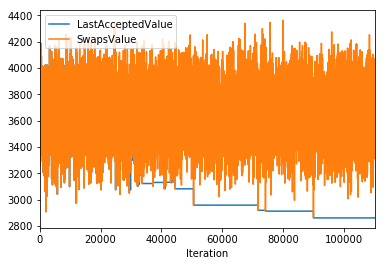

In [881]:
# Creates plot graph of Lowest Accepted Value change over time

df_iter.set_index('Iteration').plot()
plt.show()

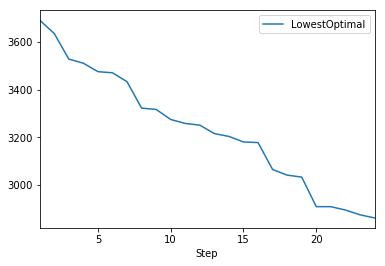

In [882]:
# Creates plot graph of Lowest Accepted Value change over time

df_opt.set_index('Step').plot()
plt.show()

In [1026]:
# Collection of print statements after algorithm
print("")
print("== Overview ==")
print("")
print("Instance Name: " + str(Name))
print("Instance Size: " + str(N))
print("")
print("-- 2opt Overview --")
print("")
print("Starting 2opt Distance: " + str(startSwapDistance))
print("2opt Iterations: " + str(swapIterationCount))
print("2opt Solution Distance: " + str(localDistance))
#print("2swap Solution Path: " + str(localTour)) # Takes up space, so comment on/off for viewing
print("CPU Time (2swap): " +str(algoswaptime) + " seconds")
print("")
print("-- Simulated Annealing Overview --")
print("")
print("Starting SA Distance: " + str(startDistance))
print("Temperature Start: " + str(Temp))
print("Temperature End: " + str(tMin))
print("Alpha (Change): " + str(alpha))
print("Iterations per Temp: " + str(iterationsTemp))
print("SA Swap Iterations: " + str(counter))
print("Solution Distance: " + str(optDist))
#print("Solution Path: " + str(optTour)) # Takes up space, so comment on/off for viewing
print("CPU Time (SA): " +str(algotime) + " seconds")
print("")
print("-- Optimal Values --")
print("")
print("Optimal Distance: " + str(optTrip))
#print("Optimal Path: " + str(optPath)) # Takes up space, so comment on/off for viewing



== Overview ==

Instance Name: st70
Instance Size: 70

-- 2opt Overview --

Starting 2opt Distance: 3772.47656264
2opt Iterations: 110000
2opt Solution Distance: 2882.51227442
CPU Time (2swap): 5.76099991798 seconds

-- Simulated Annealing Overview --

Starting SA Distance: 3772.47656264
Temperature Start: 1000.0
Temperature End: 0.01
Alpha (Change): 0.9
Iterations per Temp: 1000
SA Swap Iterations: 110000
Solution Distance: 2880.97593987
CPU Time (SA): 5.75600004196 seconds

-- Optimal Values --

Optimal Distance: 672.458107797
